In [ ]:
!pip install --upgrade tensorflow

In [ ]:

!pip install --upgrade tensorflow

!pip install numpy matplotlib scikit-learn


In [ ]:
# Import libraries
# paseenger and j10 c aircraft
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'


import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator


from google.colab import drive
drive.mount('/content/drive')

dataset_path = '/content/drive/MyDrive/data/'

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Mounted at /content/drive
Found 76 images belonging to 2 classes.
Found 18 images belonging to 2 classes.


In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # For binary classification
])

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 14s 7s/step - accuracy: 0.4419 - loss: 0.7393 - val_accuracy: 0.5000 - val_loss: 0.6906
Epoch 2/10
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step - accuracy: 0.4688 - loss: 0.6947

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 252ms/step - accuracy: 0.4688 - loss: 0.6947 - val_accuracy: 0.5000 - val_loss: 0.6969
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 276ms/step - accuracy: 0.5407 - loss: 0.6828 - val_accuracy: 0.5000 - val_loss: 0.7033
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - accuracy: 0.4375 - loss: 0.7219 - val_accuracy: 0.5000 - val_loss: 0.6893
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 396ms/step - accuracy: 0.5511 - loss: 0.6766 - val_accuracy: 0.7222 - val_loss: 0.6862
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 251ms/step - accuracy: 0.7812 - loss: 0.6831 - val_accuracy: 0.5000 - val_loss: 0.6880
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 357ms/step - accuracy: 0.5199 - loss: 0.6829 - val_accuracy: 0.6111 - val_loss: 0.6825
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 240ms/step - accuracy: 0.8125 - loss: 0.6724 - val_accuracy: 0.7222 - val_loss: 0.6795
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 619ms/step - accuracy: 0.6667 - loss: 0.6595 - val_accuracy: 0.5000 - val_loss: 0.6738
Epo

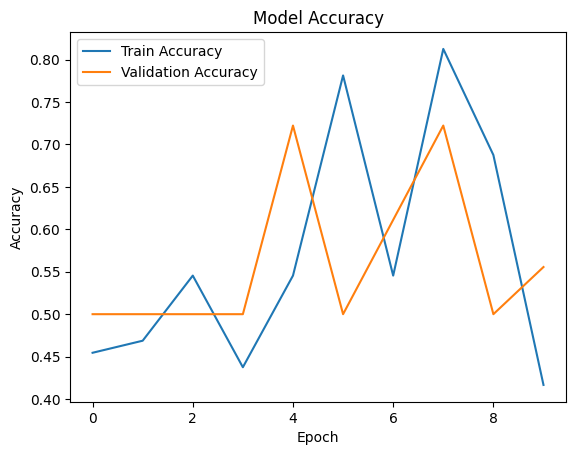

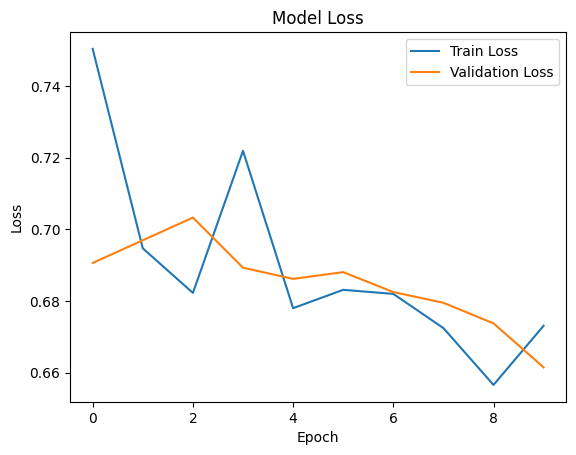

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
test_loss, test_accuracy = model.evaluate(validation_generator)
print(f"Test Accuracy: {test_accuracy:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step - accuracy: 0.5556 - loss: 0.6615
Test Accuracy: 0.56


In [ ]:
!wget  https://media.defense.gov/2021/Sep/29/2002864244/-1/-1/0/080103-F-CN113-9012.JPG -O /content/your_image_name.jpg
img_path = '/content/your_image_name.jpg'

--2024-11-12 04:57:05--  https://media.defense.gov/2021/Sep/29/2002864244/-1/-1/0/080103-F-CN113-9012.JPG
Resolving media.defense.gov (media.defense.gov)... 104.110.137.55, 2600:1407:3c00:796::221c, 2600:1407:3c00:793::221c
Connecting to media.defense.gov (media.defense.gov)|104.110.137.55|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1295943 (1.2M) [image/jpeg]
Saving to: ‘/content/your_image_name.jpg’

/content/your_image 100%[===================>]   1.24M  7.30MB/s    in 0.2s    

2024-11-12 04:57:06 (7.30 MB/s) - ‘/content/your_image_name.jpg’ saved [1295943/1295943]



In [ ]:
img_path = '/content/your_image_name.jpg'

# Proceed with making predictions or displaying the image
from tensorflow.keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(64, 64))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict class
prediction = model.predict(img_array)
print("Predicted Class:", "Class 1" if prediction[0] > 0.5 else "Class 0")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predicted Class: Class 1


In [ ]:
print(train_generator.class_indices)

{'fighter': 0, 'passenger': 1}


extra to check the i
mages

In [ ]:
import matplotlib.pyplot as plt

# Get a batch of images from the training set
images, labels = next(train_generator)

# Get the first 5 images and their corresponding labels
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(images[i])  # Display image
    plt.title(f"Label: {labels[i]}")  # Display the label
    plt.axis('off')

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Loop through the batches from the generator
for images, labels in train_generator:
    # Get images of Class 0 (if Class 0 is assigned label 0)
    class_0_images = images[labels == 0]

    # Get images of Class 1 (if Class 1 is assigned label 1)
    class_1_images = images[labels == 1]

    # Display one image from each class
    if len(class_0_images) > 0 and len(class_1_images) > 0:
        plt.subplot(1, 2, 1)
        plt.imshow(class_0_images[0])  # Display first image from Class 0
        plt.title('Class 0')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(class_1_images[0])  # Display first image from Class 1
        plt.title('Class 1')
        plt.axis('off')

        plt.show()
        break  # Display one batch, then stop

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Path to the test image
img_path = '/content/your_image_name.jpg'  # Change to your actual image path

# Load and preprocess the image
img = image.load_img(img_path, target_size=(64, 64))  # Resize image to match model input
img_array = image.img_to_array(img) / 255.0           # Normalize image
img_array = np.expand_dims(img_array, axis=0)         # Add batch dimension

# Predict the class
prediction = model.predict(img_array)
predicted_class = "Class 1" if prediction[0] > 0.5 else "Class 0"

# Output the result
print("Predicted Class:", predicted_class)

# Optional: show the image for visual verification
import matplotlib.pyplot as plt
plt.imshow(img)
plt.title(predicted_class)
plt.axis('off')
plt.show()
